# Introduction
TMDb movie data(cleaned from original data on Kaggle)
  Overview and Notes
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time




# Questions

Q:What is the annual rate of production for each genre of movies?


Q: Which genres are most popular, profitable, high rated, high vote count from year to year?

Q: What kinds of properties are associated with movies that have high revenues?

Q:What kinds of properties are associated with the most popular movies?

Q: What kinds of properties are associated with the highest rated movies?

Q. What is the relation between popularity and vote_count?

Q: What is the relation between the vote_count and vote_average(Rated)?

Q:Is there a connection between runtime and budget?

Q:Is there a connection between the total revenue and the total budget?

Q: Most Popular Directors?

Q:Average Runtime ?

In [17]:
# Loading the data
path="/content/drive/MyDrive/Colab Notebooks/tmdb-movies.csv"
df=pd.read_csv(path)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [18]:
# importing the packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Data Wrangling

In [ ]:
#Exploreing the shape of data
df.shape

(10866, 21)

In [ ]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [ ]:
# The basic information about the data
# df.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

from above we understand We need convert The 'release_date' column to datetime, and convert 'runtime' to int and also am gone retrive duplicated *row*

In [ ]:
df.duplicated().sum()

1

The number of duplicate rows in your DataFrame is indicated by the value 1. By looking into the DataFrame further, it is possible to determine and analyze which exact row or rows are duplicates.

In [ ]:
df.loc[df.duplicated(keep='first'), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


now let us count the number of missing (null orNAN) values in each column of a DataFrame

In [ ]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

contains one duplicate and null values. We should eliminate unnecessary columns like "homepage" and "keywords".

In [ ]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [ ]:
df.original_title.duplicated().sum()

295

from above we understand  a number of duplicated original_title let see them

In [ ]:
df.loc[df.original_title.duplicated(keep='first'), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/2014,23,4.9,2014,0.000000e+00,0.00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/2014,33,4.8,2014,0.000000e+00,0.00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/1977,10,5.0,1977,0.000000e+00,0.00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/2009,381,6.7,2009,2.642641e+07,44028788.73
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/2009,109,7.8,2009,0.000000e+00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,...,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/1978,17,6.1,1978,0.000000e+00,0.00
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/1966,99,5.9,1966,9.256081e+06,0.00
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/1966,14,6.1,1966,0.000000e+00,0.00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/1966,26,6.2,1966,0.000000e+00,0.00


 **Data cleaning**



                     **Modifying datatype**

In [ ]:
# convert the 'release_date' column to datetime
df.release_date = pd.to_datetime(df.release_date)
# convert the 'runtime' column to int
df.runtime = df.runtime.astype('int64')

                 **Remove Duplicates**

In [ ]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# know checking if there are any duplicate rows in the DataFrame
df.duplicated().sum().any()

False

we understand from here there are no duplicates row.

In [ ]:
# Delete duplicated movie titles and keep only the last occurrence
df.drop_duplicates(subset='original_title', keep='last', inplace=True)

# Check the number of duplicate movie titles after removal
print(df['original_title'].duplicated().sum())


0


         **Delete unused columns**


In [ ]:
# We need to remove the unused and unimportnat column like ('homepage' &'keywords')
df.drop(columns=['homepage', 'keywords'], inplace=True)

We need to fill Zero values cells with mean value of each value.

In [ ]:
# Function to fill zero values with mean
def fill_zero_values(column):
    df[column] = df[column].replace(0, df[column].mean())

# List of columns to fill zero values
columns_to_fill_zero = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'budget_adj', 'revenue_adj']

# Apply the function to each column
for column in columns_to_fill_zero:
    fill_zero_values(column)


We need to remove the NaN cells from dataset

In [ ]:
# Removing null
df.dropna(inplace=True)

In [ ]:
#let check if there is any NaN values in our dataframe
df.isnull().sum().any()

False

In [ ]:
#let see our filnal dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
df.shape

(7410, 19)

#         Exploratory Data analysis







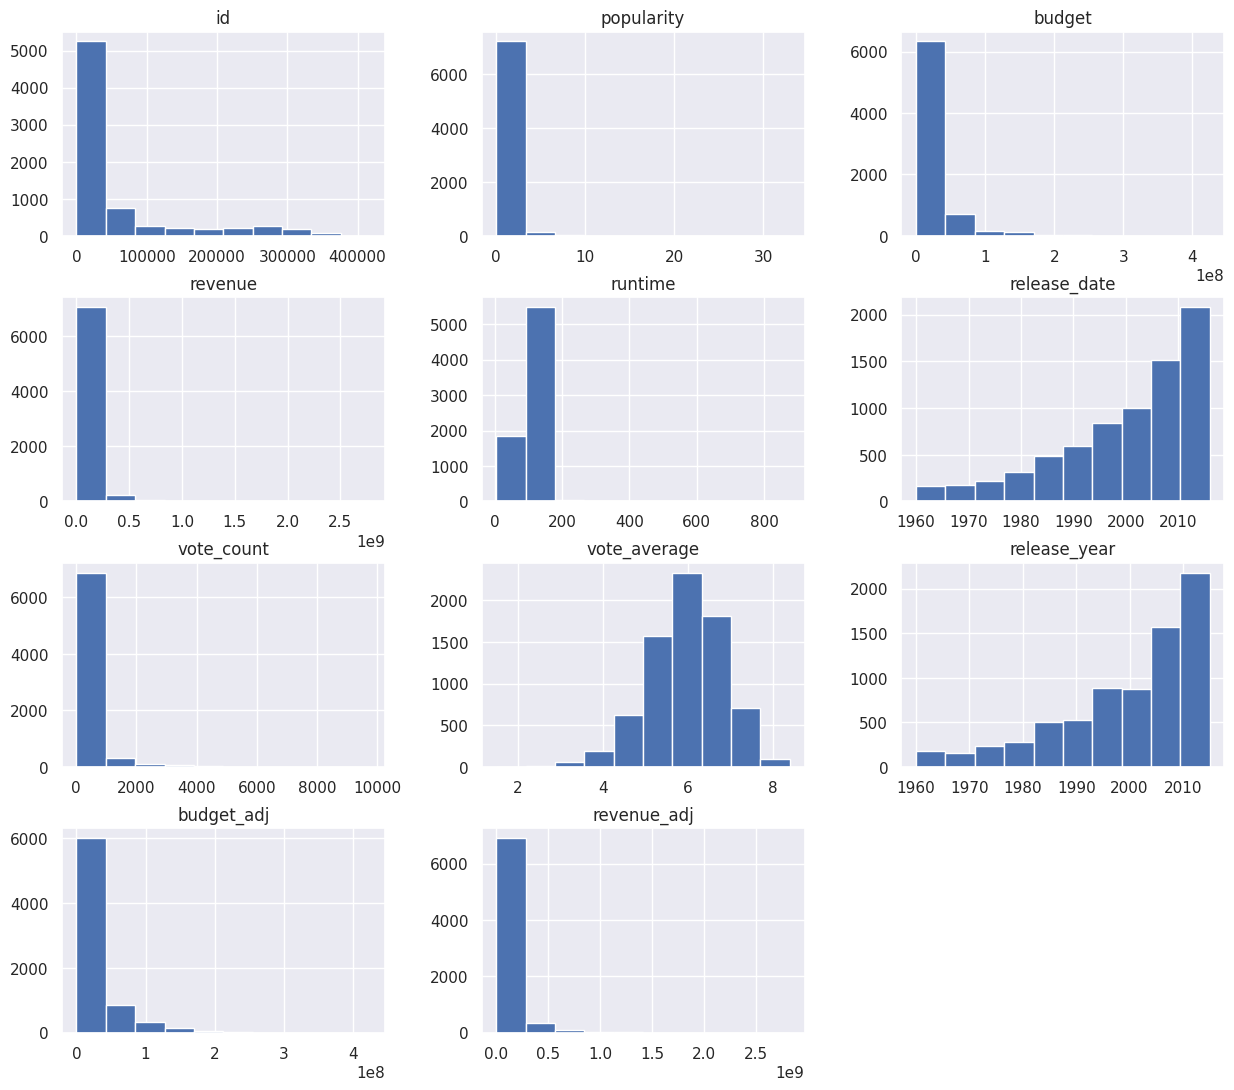

In [ ]:
df.hist(figsize=(15,13));

checking the correlation to see the relation between the factors

**Q: What factors are important for us to know?**

<ipython-input-71-8e33d6629720>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "Blues", linewidths=0.1, annot=True);


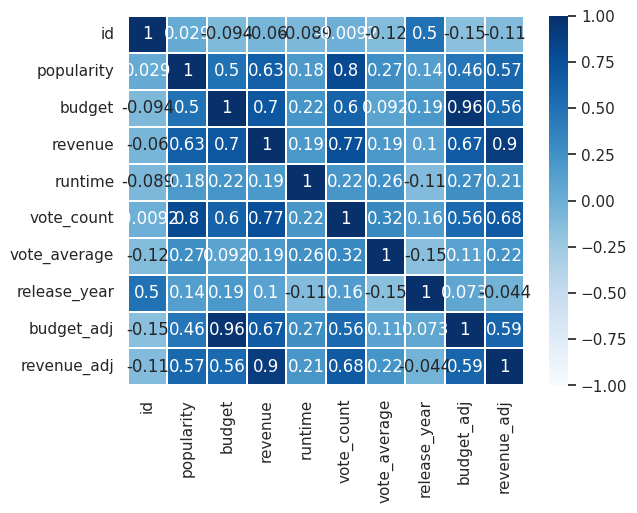

In [ ]:
#help(sns.heatmap)
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "Blues", linewidths=0.1, annot=True);

**Q:What is the annual rate of production for each genre of movies?**

In [ ]:
def countplot(df, genre):
    query = df.query('genres == "{}"'.format(genre))['release_year']
    yr = sns.countplot(data=df, x=query, linewidth=3)
                       #color='none')
    yr.set_xticklabels(yr.get_xticklabels(), rotation=80)
    plt.show();


#countplot(df, 'Comedy')

In [ ]:
genre = df.genres.str.cat(sep='|')
genre = pd.Series(genre.split('|')).str.strip()
#genre.value_counts()
genre = list(genre.unique())
del genre[-1] #because Foreign movies have data bool value
genre

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Western',
 'War',
 'Romance',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie']

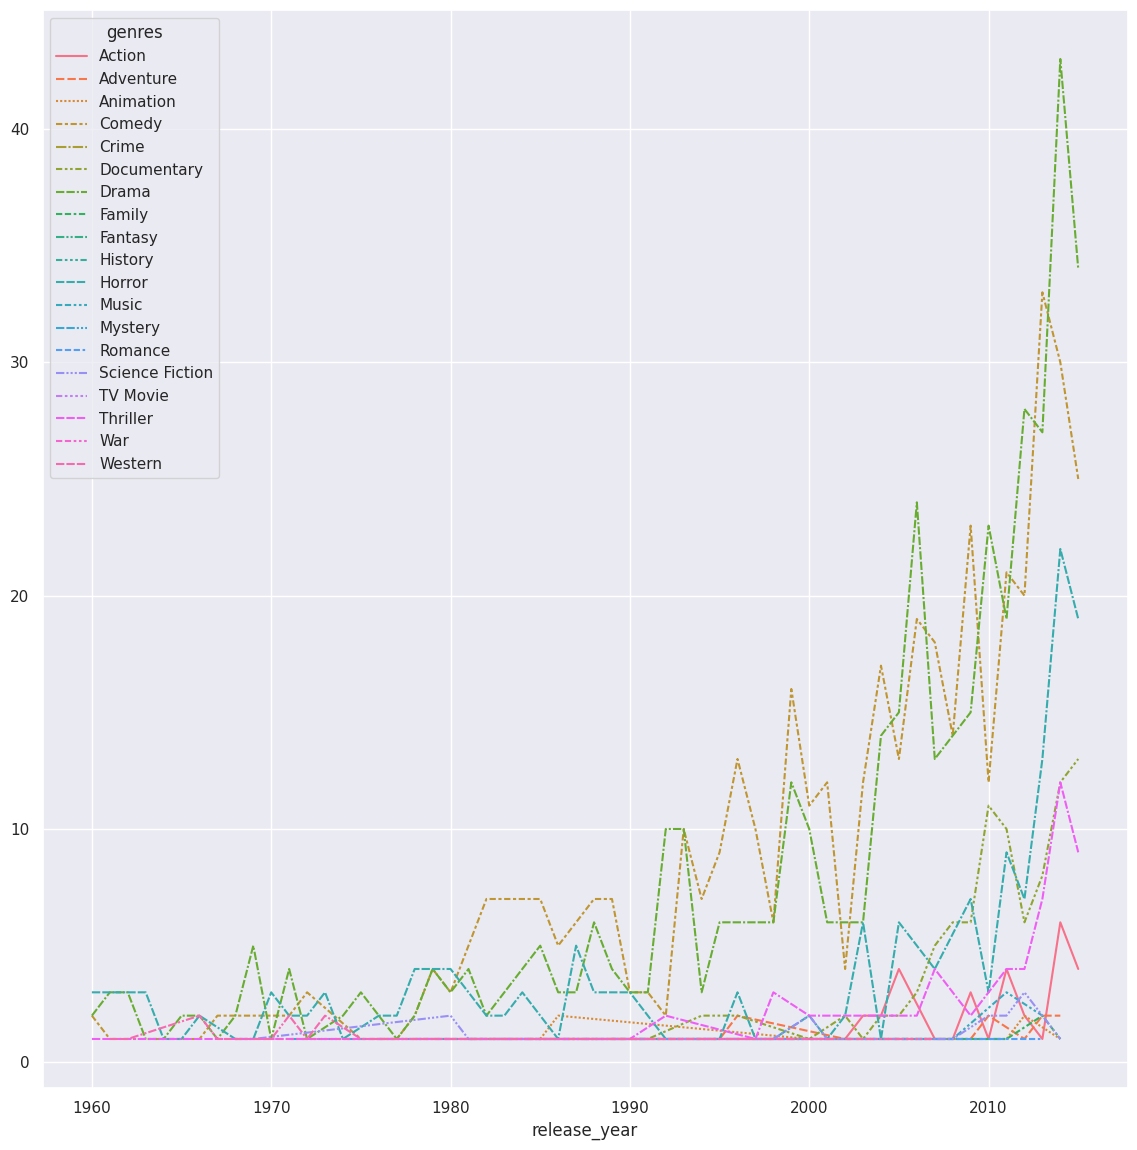

In [ ]:
df_1 = df[df.genres.isin(genre)]
df_1=df_1.groupby(['release_year', 'genres']).size().unstack()

plt.figure(figsize= (14, 14))
sns.lineplot(data=df_1);

from our graph we understand that most of our gener show positive trend mean on average the number movies produced in the specified gener trends to increase as the year go by

Action


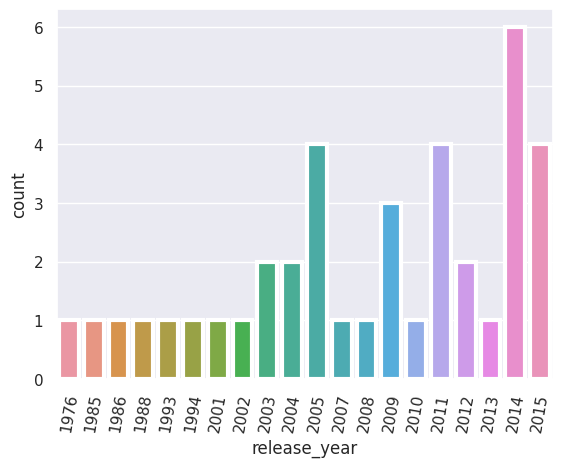

Adventure


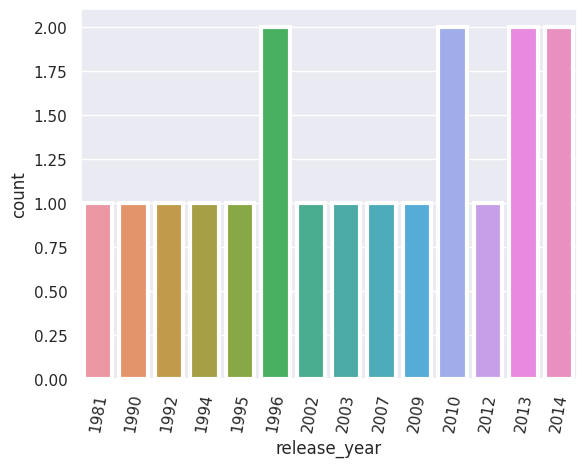

Science Fiction


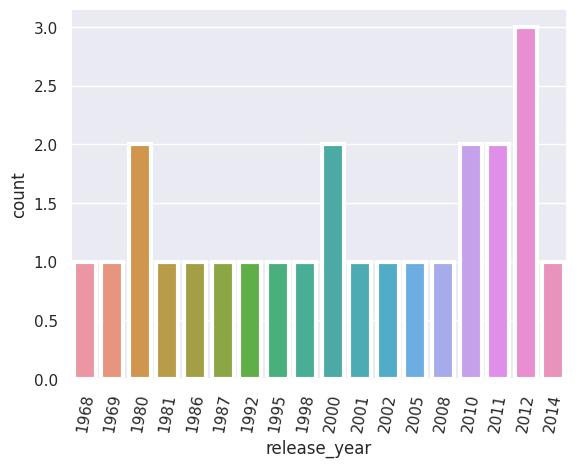

Thriller


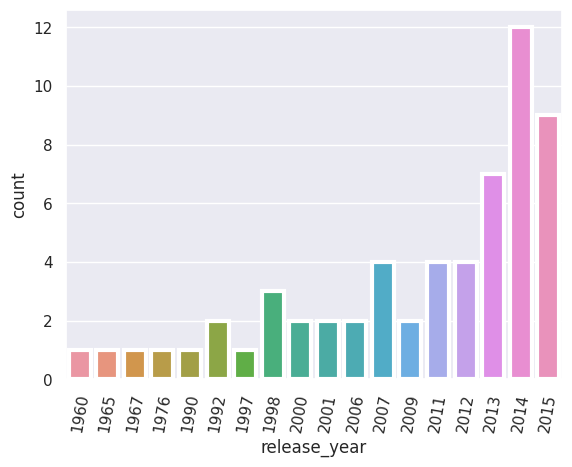

Fantasy


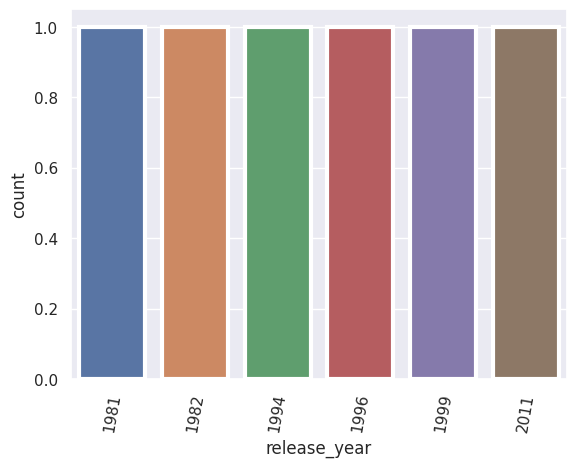

Crime


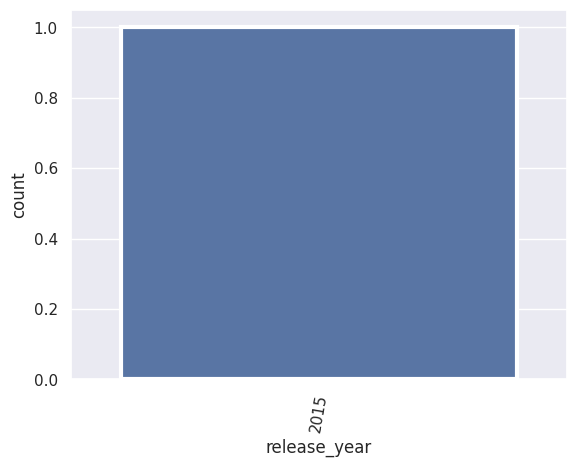

Drama


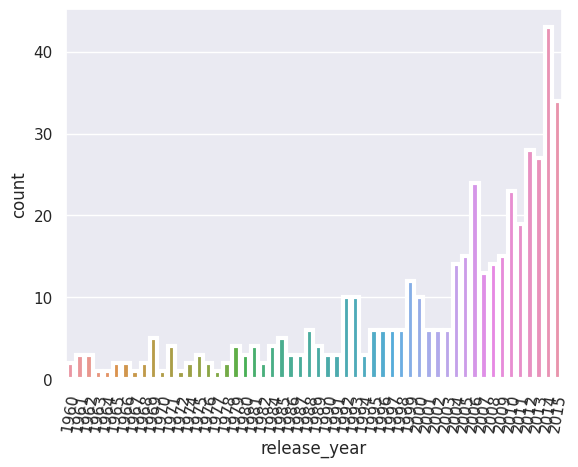

Family


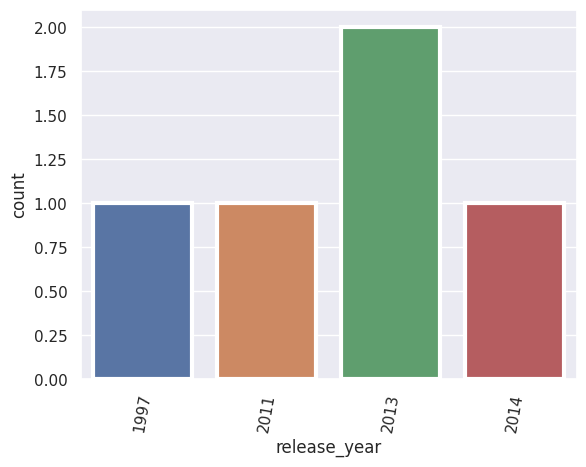

Animation


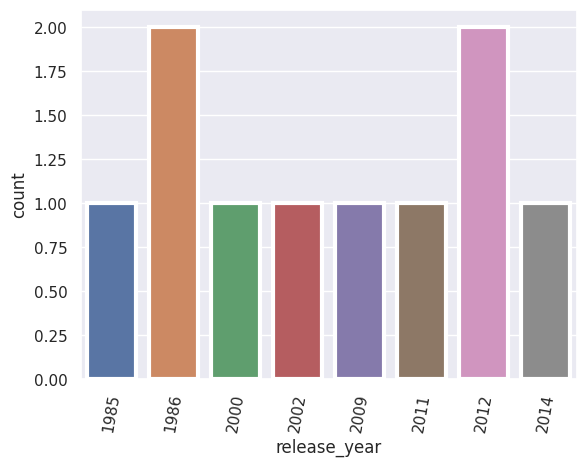

Comedy


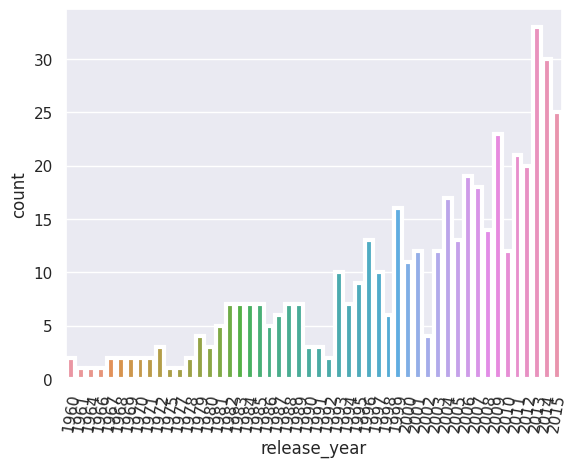

Mystery


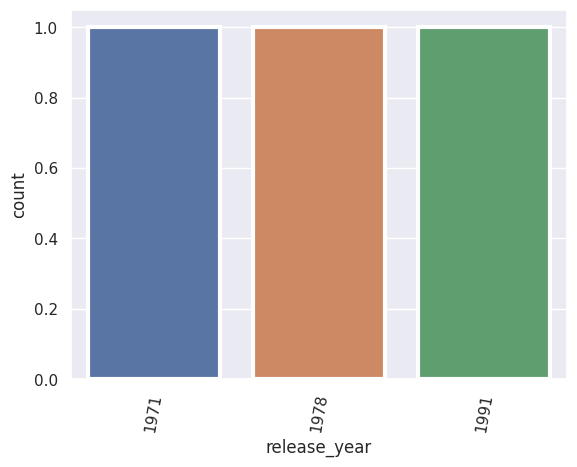

Western


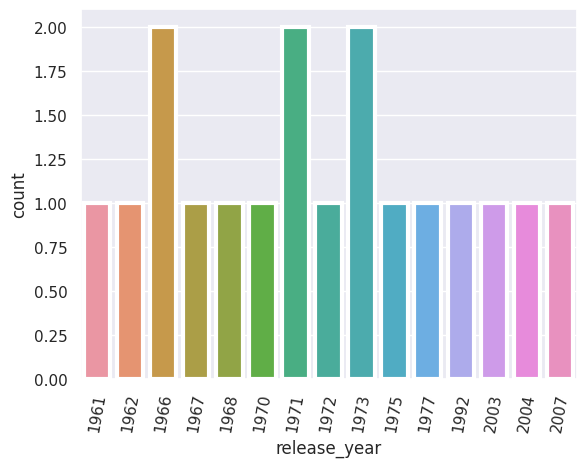

War


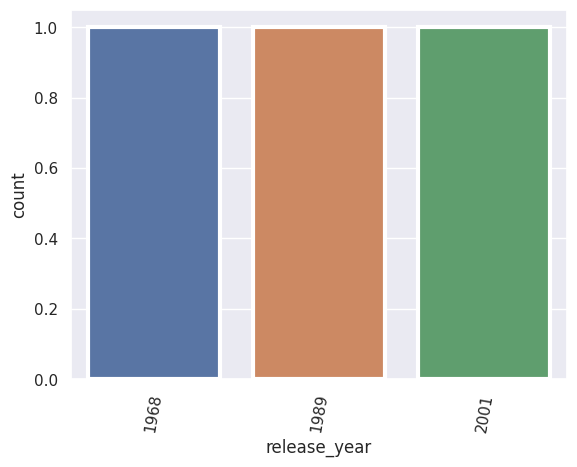

Romance


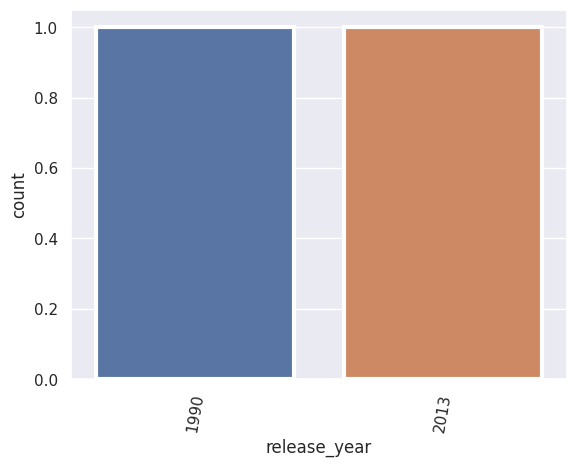

History


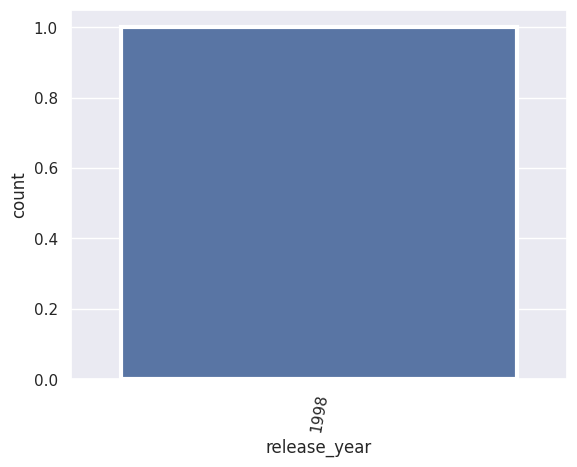

Music


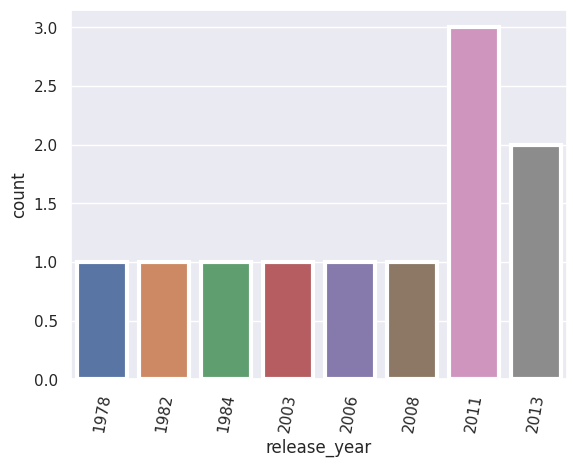

Horror


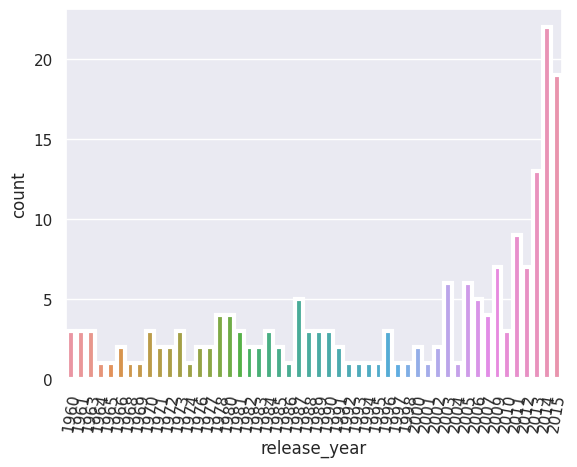

Documentary


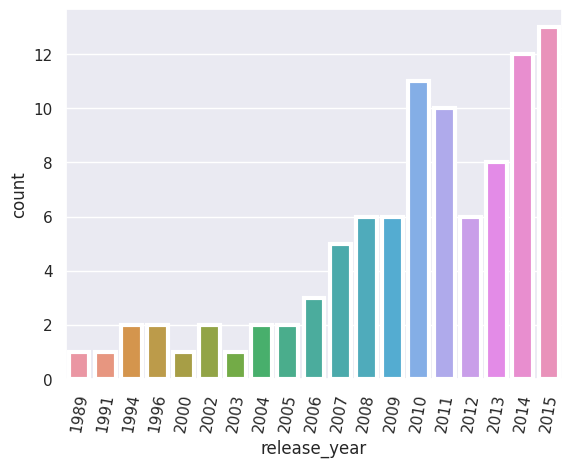

TV Movie


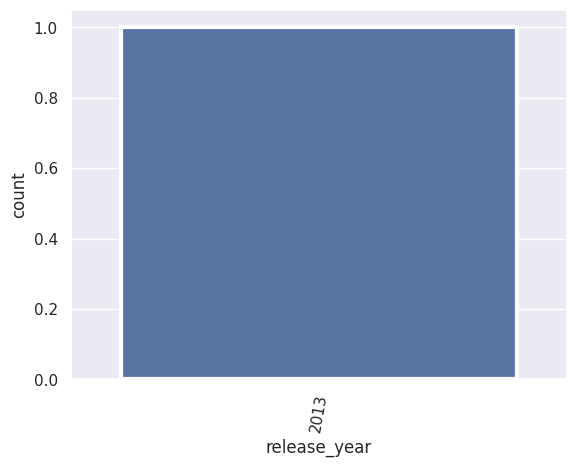

In [ ]:
for x in genre:
    print(x)
    countplot(df, '{}'.format(x))

**The annual rate of film production for each type of film:**

**Dramatic Films**: 2014 is the most dramatic year to date.

**Comedy Movies**: 2013 was the year with the most comedies.

**Romance Films**: 1990 and 2013 are the years with the most Romances.

**Animation films**: The two most successful years were 1986 and 2012.

**Action Films**: 2014 was the biggest year for action films.

**Fantasy Films**: The same years (1981,1982,1994,1996,1999,2011) rank highest.

**Western Films**: The same years (1966,1971,1973) rank highest.

**Science Fiction Films**: 2012 was the most successful year for science fiction films.

**Documentary**: 2015 was the most successful year for Documentary films.

**Horror**: 2015 was the most successful year for horror films.

**war Films**: The same years (1968,1989,2001) rank highest.

# Q: Which genres are most popular, profitable, high rated, high vote count from year to year?

In [ ]:
# getting the profit and appending it into profit column
df['all_revenue'] = df.revenue + df.revenue_adj
df['all_budget'] = df.budget + df.budget_adj
df['profit'] = df.all_revenue - df.all_budget
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,2.905975e+09,287999939.3,2.617975e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,7.265976e+08,287999939.3,4.385977e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,...,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,5.668572e+08,211199955.5,3.556573e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,...,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,3.970901e+09,383999919.0,3.586901e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,...,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,2.891998e+09,364799923.1,2.527198e+09


In [ ]:
# function to get data and concatenating it to one of the dataset properties classification
# Here we need to split movie genres and connecting each genre with its related data
def get_data(data, column):
    data = data[column].str.cat(sep='|')
    data = pd.Series(data.split('|')).str.strip()
    data_counts = data.value_counts(ascending=True)
    return data_counts

#get_data(df, 'genres')
def drow(y, color):
    movies = get_data(y, 'genres')
    movies.plot(kind='bar', figsize=(10,10), color='{}'.format(color))
    plt.xlabel('movie genre',fontsize= 14)
    plt.ylabel('NO.of movies',fontsize= 14)

obtaining the most profitable information and linking it to the relevant film genre

profit and genres relationship


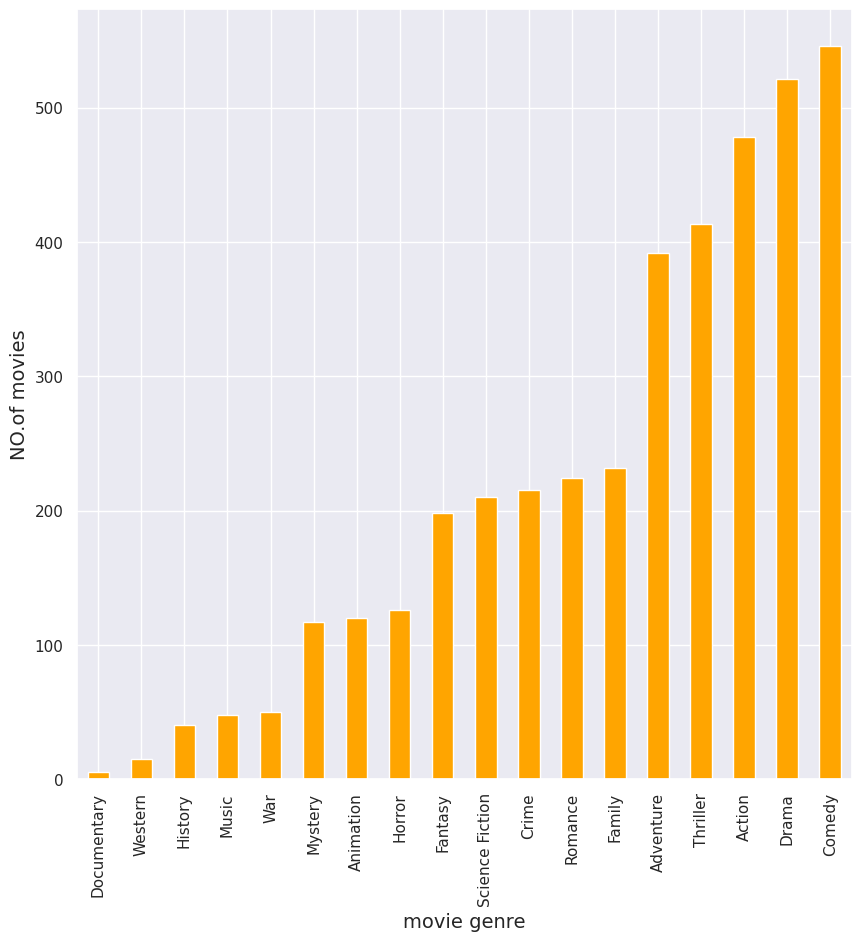

In [ ]:
# getting the highest profit data and connecting them to its related movie genre
print('profit and genres relationship')
highest_profit = df[df.profit > df.profit.mean()]
drow(highest_profit, 'orange')

obtaining the data with the highest vote average(highest rated) and linking it to the relevant film genre

highest vote average and genres relationship


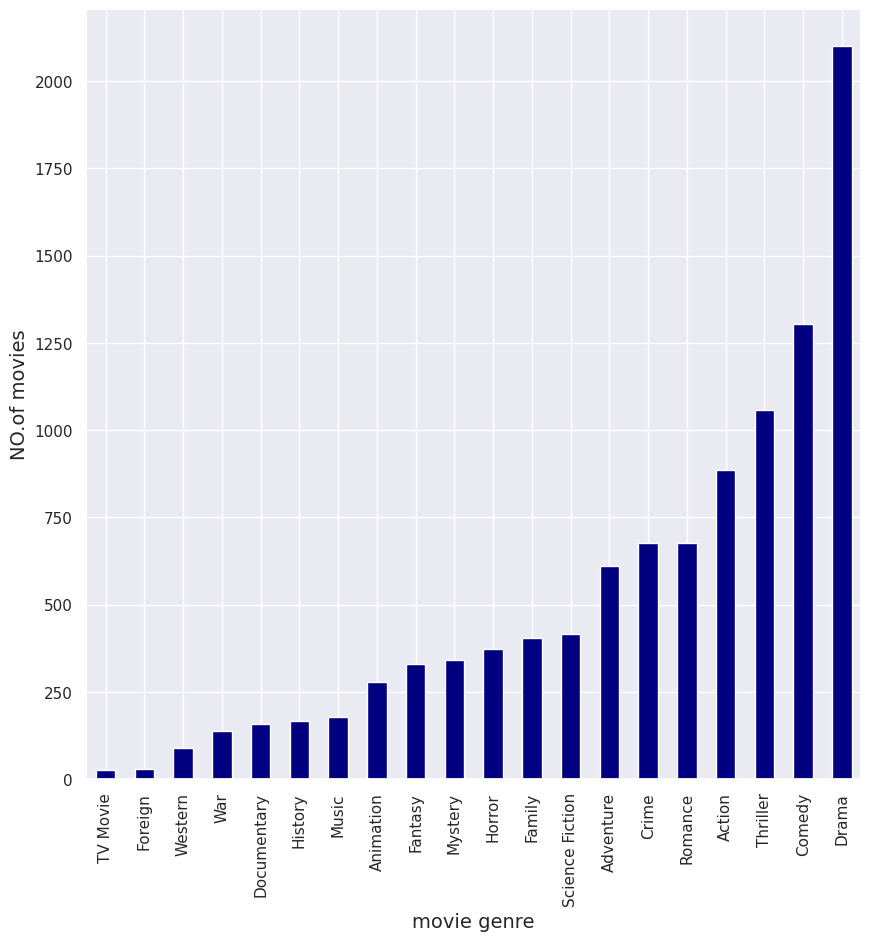

In [ ]:
# getting the highest vote average data and connecting them to its related movie genre
print('highest vote average and genres relationship')
highest_vote_average = df[df.vote_average > df.vote_average.mean()]
drow(highest_vote_average, 'navy')

getting the highest vote_count data and connecting them to its related movie genre

highest vote count and genres relationship


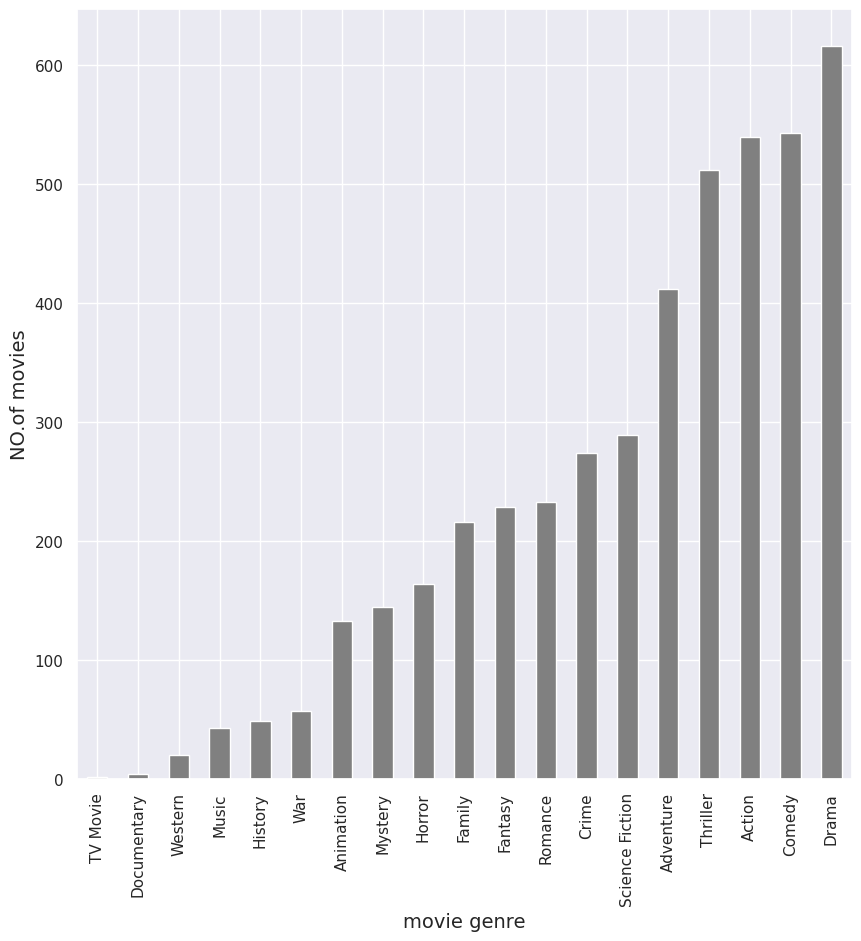

In [ ]:
# getting the highest vote count data and connecting them to its related movie genre
print('highest vote count and genres relationship')
highest_vote_count = df[df.vote_count > df.vote_count.mean()]
drow(highest_vote_count, 'gray')


getting the highest popularity data and connecting them to its related movie genre

highest popularity and genres relationship


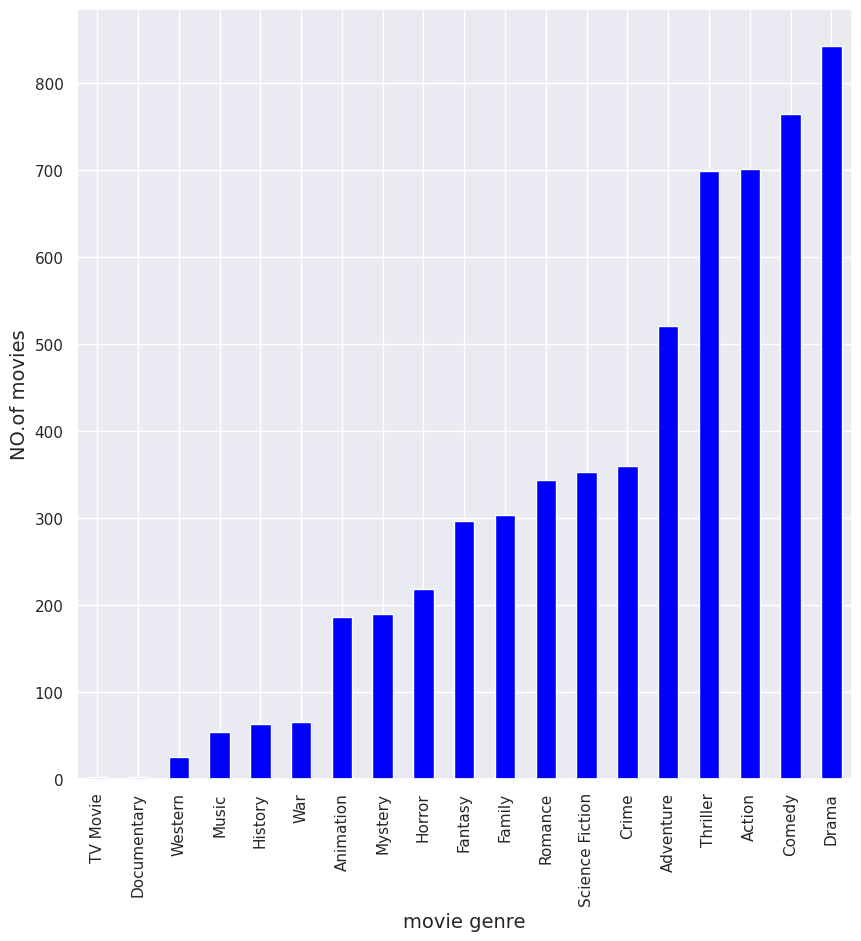

In [ ]:
# getting the highest popularity data and connecting them to its related movie genre
print('highest popularity and genres relationship')
highest_popularity = df[df.popularity > df.popularity.mean()]
drow(highest_popularity, 'blue')

# **The highest profitable, rated, vote_count, popular movie genre:**

The most Profitable movie genres are First: Comedy, Second: Drama, Third: Action and least profitable :Documantary

The highest rated movie genres are First: Drama, Second: Comedy, Third: Thriller and also least rated:Tv Movie

The most vote_count movie genres are First: Drama, Second: Action, Third: Comedy and also least vote_count:Tv Movie

The most Popular movie genres are First: Drama, Second: Comedy, Third: Action and also least popular:TV Movie and Documantary

# **Q: What kinds of properties are associated with movies that have high revenues?**

In [ ]:
# getting the Top 10 highest revenue movies and their properties
top_10 = df.all_revenue.nlargest(10).index
df.loc[top_10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",...,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,5.608630e+09,4.778869e+08,5.130743e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,...,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,3.970901e+09,3.839999e+08,3.586901e+09
1329,11,tt0076759,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",Princess Leia is captured and held hostage by ...,...,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,3.565110e+09,5.057559e+07,3.514535e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2.905975e+09,2.879999e+08,2.617975e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,...,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,2.891998e+09,3.647999e+08,2.527198e+09
14,99861,tt2395427,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,...,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,2.697668e+09,5.375999e+08,2.160068e+09
8094,1642,tt0113957,1.136610,22000000.0,1.106280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,Angela Bennett is a freelance software enginee...,...,Columbia Pictures,1995-07-28,201,5.6,1995,3.148127e+07,1.583050e+09,2.689329e+09,5.348127e+07,2.635848e+09
3374,12445,tt1201607,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,"Harry, Ron and Hermione continue their quest t...",...,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09,2.615002e+09,2.461748e+08,2.368827e+09
10594,9552,tt0070047,2.010733,8000000.0,4.413061e+08,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Something almost beyond comprehension is happe...,12-year-old Regan MacNeil begins to adapt an e...,...,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09,2.608631e+09,4.728928e+07,2.561342e+09
8889,601,tt0083866,2.900556,10500000.0,7.929106e+08,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,He is afraid. He is alone. He is three million...,A science fiction fairytale about an extra-ter...,...,Universal Pictures|Amblin Entertainment,1982-04-03,1830,7.2,1982,2.372625e+07,1.791694e+09,2.584605e+09,3.422625e+07,2.550379e+09


 Top10 Movies
               
     1.Avatar
     2. Star Wars: The Force Awakens
     3.Star Wars
     4.Jurassic World
     5.Furious 7
     6.Avengers: Age of Ultron
     7.The Net
     8.Harry Potter and the Deathly Hallows: Part 2
     9.The Exorcist
     10.E.T. the Extra-Terrestrial







# Q:What kinds of properties are associated with the most popular movies?

getting the Top 10 highest popular movies and their properties

In [ ]:
# getting the Top 10 highest popular movies and their properties
top_10 = df['popularity'].nlargest(10).index
df.loc[top_10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2.905975e+09,2.879999e+08,2.617975e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,7.265976e+08,2.879999e+08,4.385977e+08
629,157336,tt0816692,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,...,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,1.194443e+09,3.169800e+08,8.774631e+08
630,118340,tt2015381,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,All heroes start somewhere.,"Light years from Earth, 26 years after being a...",...,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,1.485604e+09,3.265855e+08,1.159018e+09
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,...,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,5.668572e+08,2.112000e+08,3.556573e+08
631,100402,tt1843866,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,In heroes we trust.,After the cataclysmic events in New York with ...,...,Marvel Studios,2014-03-20,3848,7.6,2014,1.565855e+08,6.583651e+08,1.373132e+09,3.265855e+08,1.046546e+09
1329,11,tt0076759,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",Princess Leia is captured and held hostage by ...,...,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,3.565110e+09,5.057559e+07,3.514535e+09
632,245891,tt2911666,11.422751,20000000.0,7.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,Don't set him off.,"After the sudden death of his beloved wife, Jo...",...,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07,1.512665e+08,3.842182e+07,1.128447e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,...,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,3.970901e+09,3.839999e+08,3.586901e+09
633,131631,tt1951265,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Fire burns brighter in the darkness,Katniss Everdeen reluctantly becomes the symbo...,...,Lionsgate|Color Force,2014-11-18,3590,6.6,2014,1.151364e+08,6.927528e+08,1.444853e+09,2.401364e+08,1.204717e+09


Top 10 highest popular

    1.Jurassic World
    2.Mad Max: Fury Road
    3.Interstellar
    4.Guardians of the Galaxy
    5.Insurgent
    6.Captain America: The Winter Soldier
    7.Star Wars
    8.John Wick
    9.Star Wars: The Force Awakens
    10.The Hunger Games: Mockingjay - Part 1



# Q: What kinds of properties are associated with the highest rated movies?
getting the Top 10 highest rated movies and their properties

In [ ]:
# getting the Top 10 highest rated movies and their properties
top_10 = df['vote_average'].nlargest(10).index
df.loc[top_10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
609,321640,tt4299972,0.033378,1.427461e+07,3.874460e+07,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,"Robert Durst, scion of one of New Yorkâ€™s bil...",...,Blumhouse Productions|Hit the Ground Running F...,2015-02-08,72,8.4,2015,1.722487e+07,5.040544e+07,8.915005e+07,3.149948e+07,5.765057e+07
4178,278,tt0111161,7.192039,2.500000e+07,2.834147e+07,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...,...,Castle Rock Entertainment,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07,7.003493e+07,6.177779e+07,8.257143e+06
7948,24128,tt0088178,0.283191,1.200000e+06,4.978922e+06,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,Why stop making sense? Why a movie? Why a big ...,David Byrne walks onto the stage and does a so...,...,Talking Heads|Arnold Stiefel Company,1984-11-16,23,8.4,1984,2.518850e+06,1.045097e+07,1.542989e+07,3.718850e+06,1.171104e+07
7269,238,tt0068646,5.738034,6.000000e+06,2.450664e+08,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o...",...,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972,3.128737e+07,1.277914e+09,1.522980e+09,3.728737e+07,1.485693e+09
650,244786,tt2582802,4.780419,3.300000e+06,1.399309e+07,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,The road to greatness can take you to the edge.,"Under the direction of a ruthless instructor, ...",...,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,2372,8.2,2014,3.039600e+06,1.288891e+07,2.688201e+07,6.339600e+06,2.054241e+07
9315,20423,tt0097372,0.163885,1.427461e+07,3.874460e+07,For All Mankind,Jim Lovell|Russell Schweickart|Eugene Cernan|M...,Al Reinert,A Film by Al Reinert,"In July 1969, the space race ended when Apollo...",...,Apollo Associates|FAM Productions,1989-01-01,16,8.2,1989,1.722487e+07,5.040544e+07,8.915005e+07,3.149948e+07,5.765057e+07
2389,55244,tt1621444,0.052322,1.427461e+07,1.339650e+06,Bill Cunningham New York,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,Richard Press,"He who seeks beauty, will find it.",Chronicles a man who is obsessively interested...,...,First Thought Films,2010-03-24,16,8.1,2010,1.722487e+07,1.339650e+06,2.679300e+06,3.149948e+07,-2.882018e+07
2409,550,tt0137523,8.947905,6.300000e+07,1.008538e+08,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,How much can you know about yourself if you've...,A ticking-time-bomb insomniac and a slippery s...,...,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08,2.328766e+08,1.454703e+08,8.740632e+07
2875,155,tt0468569,8.466668,1.850000e+08,1.001922e+09,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,...,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09,2.016655e+09,3.723655e+08,1.644289e+09
3826,414419,tt6019206,0.146477,3.000000e+07,3.874460e+07,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,The bride is back for the final cut,Kill Bill: The Whole Bloody affair is a comple...,...,Miramax Films|A Band Apart|Super Cool ManChu,2011-03-28,28,8.1,2011,2.908194e+07,5.040544e+07,8.915005e+07,5.908194e+07,3.006811e+07


# Top 10 highly rated Movies

    1.The Jinx: The Life and Deaths of Robert Durst
    2.The Shawshank Redemption
    3.Stop Making Sense
    4.The Godfather
    5.Whiplash
    6.For All Mankind
    7.Bill Cunningham New York
    8.Fight Club
    9.The Dark Knight
    10.Kill Bill: The Whole Bloody Affair





#Q. What is the relation between popularity and vote_count?

visualizing the realtionship between popularity and vote_count by scatter plot to clarify the effect of popularity on the vote count

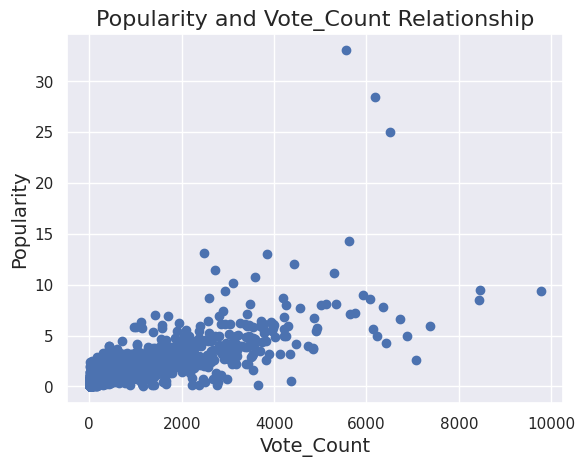

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# visualizing the realtionship between popularity and vote_count by scatter plot
plt.scatter(df.vote_count, df.popularity)
plt.xlabel('Vote_Count', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity and Vote_Count Relationship', fontsize= 16)
plt.figure(figsize=(16, 16));

The relationship betweeen popularity and vote_count:The Distribution is skewed to the left, positive relationship

# Q: What is the relation between the vote_count and vote_average(Rated)?
visualizing the realtionship between vote_average and vote_count by scatter plot and clarify their effect on each other

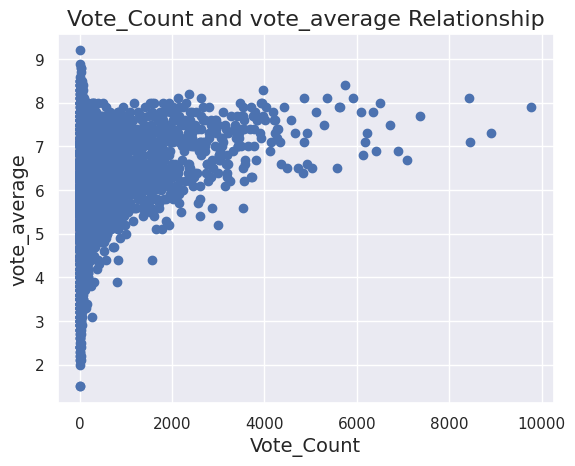

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# visualizing the realtionship between vote_rate and vote_count by scatter plot
plt.scatter(df.vote_count, df.vote_average)
plt.xlabel('Vote_Count', fontsize=14)
plt.ylabel('vote_average', fontsize=14)
plt.title('Vote_Count and vote_average Relationship', fontsize= 16)
plt.figure(figsize=(16, 16));

Relationship between vote_count and vote_average:No effect of the vote_count on the vote_average



# Q:Is there a connection between runtime and budget?
use a scatter plot to visualize the relationship between budget and runtime and determine whether or not a lengthy runtime increases the budget

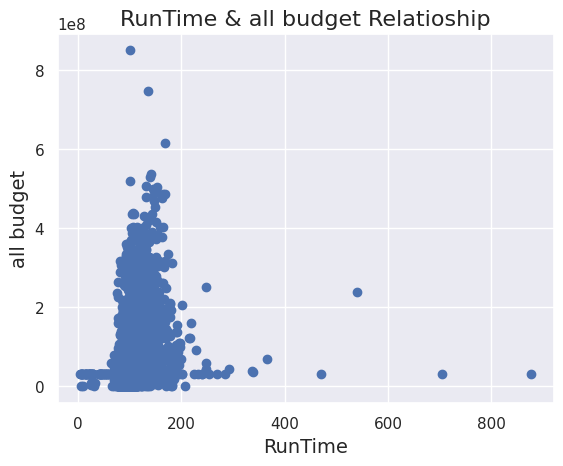

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# visualizing the realtionship between budget and runtime by scatter plot
plt.scatter(df.runtime, df.all_budget)
plt.xlabel('RunTime', fontsize=14)
plt.ylabel('all budget', fontsize=14)
plt.title('RunTime & all budget Relatioship', fontsize= 16)
plt.figure(figsize=(16, 16));

The relationship between Runtime and budget : no effect of long runtime on increasing on the buget

# Q:Is there a connection between the total revenue and the total budget?
Using a scatter plot to visualize the relationship between all income and all budget to determine whether there is a relationship at all

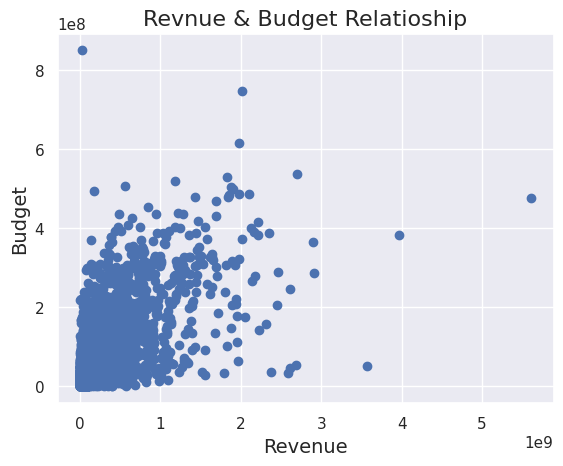

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# visualizing the realtionship between all budget and all revenue by scatter plot
plt.scatter(df.all_revenue, df.all_budget)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Budget', fontsize=14)
plt.title('Revnue & Budget Relatioship', fontsize= 16)
plt.figure(figsize=(16, 16));

relationship betweeen the Budget and the Revenue:Distribution is skewed to the left, positive relationship

# Q: Most Popular Directors?
get the Top 10 Directors over the time and their movie number they directed

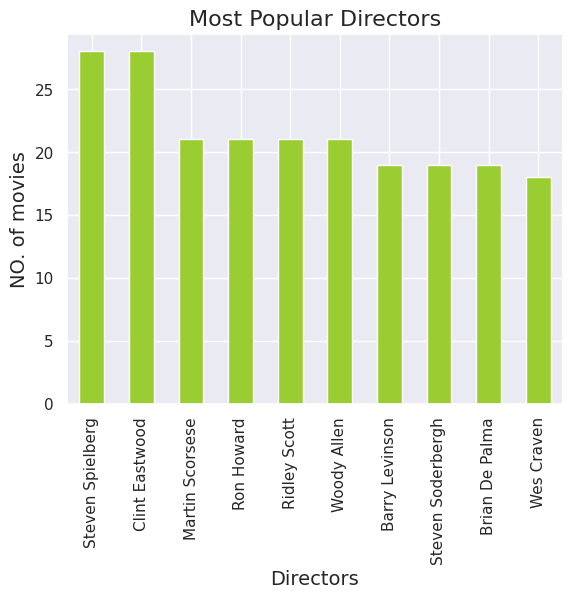

In [ ]:
Directors = df.director.value_counts().nlargest(10)
Directors.plot(kind='bar', color='yellowgreen')
plt.xlabel('Directors', fontsize=14)
plt.ylabel('NO. of movies', fontsize=14)
plt.title('Most Popular Directors', fontsize=16);

In [ ]:
Directors = df.director.value_counts().nlargest(10)
Directors

Steven Spielberg     28
Clint Eastwood       28
Martin Scorsese      21
Ron Howard           21
Ridley Scott         21
Woody Allen          21
Barry Levinson       19
Steven Soderbergh    19
Brian De Palma       19
Wes Craven           18
Name: director, dtype: int64

Above data show the most popular director and  the number of their  movice on our dataset



Q:Average Runtime ?
      we  are try to represent the average Runtime of movice and how much movice have the average runtime over time

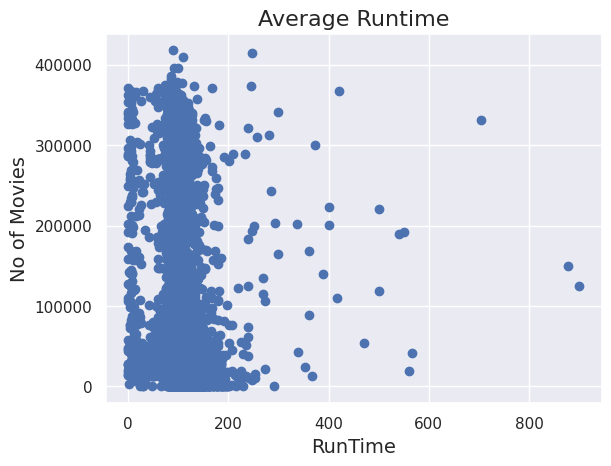

In [ ]:
# visualzing the runtime average by scatter plot
plt.scatter(df.runtime, df.id)
plt.xlabel('RunTime', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)
plt.title('Average Runtime', fontsize=16);

# **Conclusion**

# The annual rate of film production for each type of film:

Dramatic Films: 2014 is the most dramatic year to date.

Comedy Movies: 2013 was the year with the most comedies.

Romance Films: 1990 and 2013 are the years with the most Romances.

Animation films: The two most successful years were 1986 and 2012.

Action Films: 2014 was the biggest year for action films.

Fantasy Films: The same years (1981,1982,1994,1996,1999,2011) rank highest.

Western Films: The same years (1966,1971,1973) rank highest.

Science Fiction Films: 2012 was the most successful year for science fiction films.

Documentary: 2015 was the most successful year for Documentary films.

Horror: 2015 was the most successful year for horror films.

war Films: The same years (1968,1989,2001) rank highest.

# **The highest profitable, rated, vote_count, popular movie genre:**
The most Profitable movie genres are First: Comedy,
Second: Drama, Third: Action and least profitable :Documantary

The highest rated movie genres are First: Drama, Second: Comedy, Third: Thriller and also least rated:Tv Movie

The most vote_count movie genres are First: Drama, Second: Action, Third: Comedy and also least vote_count:Tv Movie

The most Popular movie genres are First: Drama, Second: Comedy, Third: Action and also least popular:TV Movie and Documantary



Top 10 Highest Revenue Movice

1.Avatar

2 Star Wars: The Force Awakens

3.Star Wars

4.Jurassic World

5.Furious 7

6.Avengers: Age of Ultron

7.The Net

8.Harry Potter and the Deathly Hallows: Part 2

9.The Exorcist

10.E.T. the Extra-Terrestrial

Toop 10 Highest popular Movice

1.Jurassic World

2.Mad Max: Fury Road

3.Interstellar

4.Guardians of the Galaxy

5.Insurgent

6.Captain America: The Winter Soldier

7.Star Wars

8.John Wick

9.Star Wars: The Force Awakens

10.The Hunger Games: Mockingjay - Part 1


Top 10 Rated Movice

1.The Jinx: The Life and Deaths of Robert Durst

2.The Shawshank Redemption

3.Stop Making Sense

4.The Godfather

5.Whiplash

6.For All Mankind

7.Bill Cunningham New York

8.Fight Club

9.The Dark Knight

10.Kill Bill: The Whole Bloody Affair

The relationship betweeen popularity and vote_count:The Distribution is skewed to the left, positive relationship

Relationship between vote_count and vote_average:No effect of the vote_count on the vote_average

The relationship between Runtime and budget : no effect of long runtime on increasing on the buget

relationship betweeen the Budget and the Revenue:Distribution is skewed to the left, positive relationship

# Most popular Directors and the number of their Movices

Steven Spielberg     28

Clint Eastwood       28

Martin Scorsese      21

Ron Howard           21

Ridley Scott         21

Woody Allen          21

Barry Levinson       19

Steven Soderbergh    19

Brian De Palma       19

Wes Craven           18

Average RunTime

between 100:150 mins

# **Limitation**
from our data we see problem


1. Nan cells must be filled with numerical values containing the mean values in columns.
2. The unnecessary and irrelevant columns, such as "homepage" and "keyword," must be eliminated.
3. The Nan cells must be eliminated from the dataset.

4. we need to convert the datatype of ('runtime') value to integer


